# DS-SF-25 | Codealong 05 | Inferential Statistics for Model Fit

In [1]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

# TODO
import statsmodels.formula.api as smf #imports statsmodel formula; imports r style 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-05.csv'), index_col = 'ID')

In [5]:
df

# mystery number 1=M1

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,...,550.0,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,...,1430.0,2435.0,1948.0,3.687657,0.430379
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,...,2040.0,3920.0,1976.0,8.975475,0.205527
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,...,1060.0,NaN,1930.0,2.317325,0.089766
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,...,1299.0,NaN,1993.0,1.380945,-0.152690
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,...,264.0,NaN,2012.0,0.428094,-0.804647
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,...,691.0,NaN,2004.0,1.302833,0.029844
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,...,1738.0,2299.0,1976.0,1.608882,0.876824


We are using our usual SF housing dataset but we added two new variables `M1` and `M2` to it.

## Exploratory Data Analysis on `M1` and `M2` on how they relate to `SalePrice`

#### Correlation

In [12]:
corr=df.corr()
corr

df[['SalePrice','M1','M2']].corr()


,SalePrice,M1,M2
SalePrice,1.000000,0.970612,0.022003
M1,0.970612,1.000000,0.166624
M2,0.022003,0.166624,1.000000


#### Scatter plots

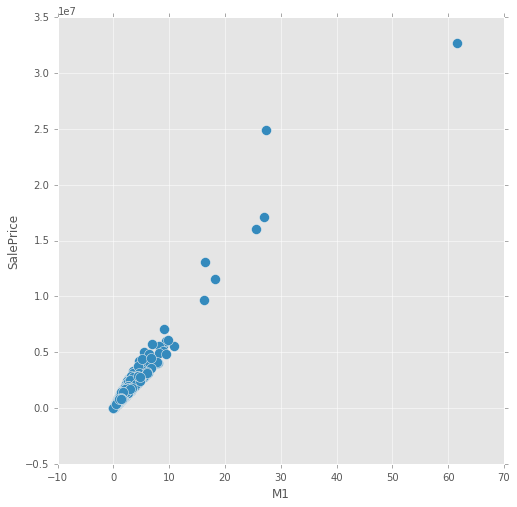

In [9]:
df[ ['M1', 'SalePrice'] ].plot(kind = 'scatter', x = 'M1', y = 'SalePrice', s = 100, figsize = (8, 8))

# could be correlated but not in a linear way

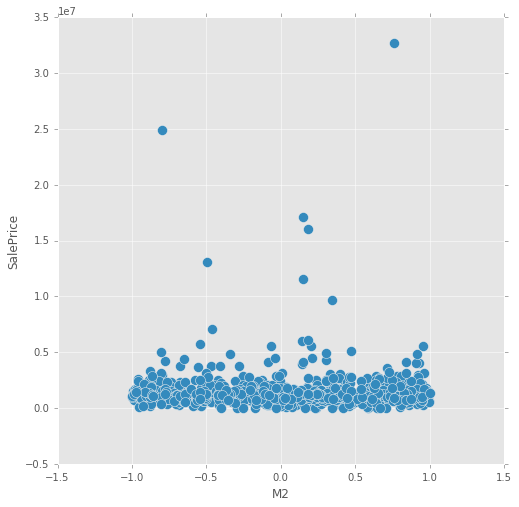

In [10]:
df[ ['M2', 'SalePrice'] ].plot(kind = 'scatter', x = 'M2', y = 'SalePrice', s = 100, figsize = (8, 8)) 

# don't need subset since start with x and y.

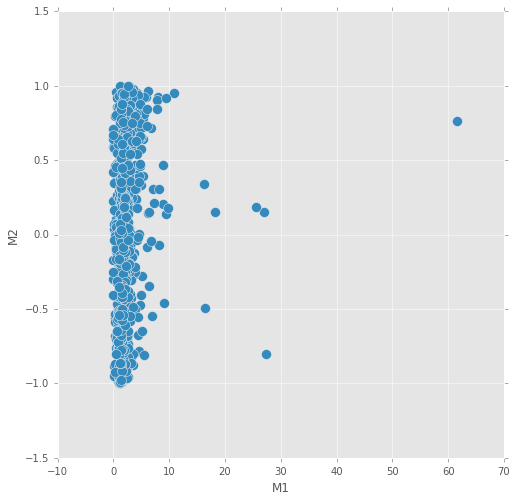

In [13]:
df.plot(kind = 'scatter', x = 'M1', y = 'M2', s = 100, figsize = (8, 8))

## Your first Machine Learning Models!

### Machine Learning Model #1 | `SalePrice` as a function of `M1`

In [23]:
# Linear regression!

X = df[['M1']] #feature matrix, a data frame
y = df['SalePrice'] #a response vector, which is a series

model = smf.OLS(y,X).fit()

type(y)

pandas.core.series.Series

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.567e+04
Date:                Wed, 27 Jul 2016   Prob (F-statistic):               0.00
Time:                        19:59:21   Log-Likelihood:                -14393.
No. Observations:                1000   AIC:                         2.879e+04
Df Residuals:                     999   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M1          6.241e+05   3894.990    160.228      0.000      6.16e+05  6.32e+05
==============================================================================
Omnibus:                     1044.296   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901486.247
Skew:                           3.948   Prob(JB):                         0.00
Kurtosis:                     149.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Machine Learning Model #2 | `SalePrice` as a function of `M2`

In [24]:
X=df[['M2']]

model = smf.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Wed, 27 Jul 2016   Prob (F-statistic):              0.792
Time:                        20:02:43   Log-Likelihood:                -16036.
No. Observations:                1000   AIC:                         3.207e+04
Df Residuals:                     999   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M2          3.195e+04   1.21e+05      0.263      0.792     -2.06e+05   2.7e+05
==============================================================================
Omnibus:                     1664.600   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986904.813
Skew:                          10.532   Prob(JB):                         0.00
Kurtosis:                     155.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.params


<bound method OLSResults.t_test of <statsmodels.regression.linear_model.OLSResults object at 0x119c3c150>>